In [1]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')

from Ltif import Lpicday, Lpic
from sklearn import datasets, metrics, svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [2]:
day = Lpicday('23_12_14')
df = day.clusters_day(min_size = 100)

100%|██████████| 20/20 [00:00<00:00, 22.42it/s]


In [19]:
target = np.array([1,1,1,1,1,1,1,2,1,2,1,1,2,1,1, #1st file
                  1,1,1,2,1,1,1,1,1,1,1,1,1,1, #2nd file
                  1,1,1,1,2,1,1,1,1,1, #3rd file
                  1,1,1,1,2,1,1,2,2,1,1,2,1, #4th file
                  1,1,2,1,1,1,1,2,2,1,2,1, #5th file !!!!! 1,1,2,1,1,1,1,2,2,1,5,1,
                  1,1,1,1,1,2,1,1,1,1,1, #6th file
                  1,1,1,1,1,1,1,1,1, #7th file !!!!!(the 2 might be a 1)
                  2,1,1,1,1,1,1,1,1,1,1,1, #8th file
                  1,1,1,1,1,2,1,2,1, #9th file
                  1,1,2,1,1,1,1,1, #10th file
                  1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,1,1,1, #11th file
                  1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1, #12th file
                  1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1, #13th file
                  1,1,1,1,2,1,1,1,1,1,1,1,1,1,1, #1,1,1,1,1,2,1,1,1,1,1,1,1, #14th file
                  1,1,1,2,1,2,2,1,1,1,1,1,1,1,2, #15th file !!!!! 1,1,1,2,1,2,4,1,1,1,1,1,1,1,2,
                  1,1,1,1,1,1,1,1,1,1,1,1,2,1, #16th file
                  1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,2,2,1,1,2,1,1, #17th file
                  1,1,2,1,1,1,1,1,1,1,1,1,1, #18th file
                  1,1,1,1,1,1,1,1,1,2,1, #19th file
                  1,1,1,1,1,1,1]) #20th file

In [4]:
cl = [val for bal in list(df['cluster']) for val in bal]

max_h = max(len(item) for item in cl) + 10
max_w = max(len(item) for item in [val for bal in cl for val in bal]) + 10

for item in [val for bal in cl for val in bal]:
    while len(item) < max_w:
        item += [0]

for item in cl:
    while len(item) < max_h:
        item += [[0] * max_w]
        
ac = np.array(cl)

data = ac.reshape(264, -1)

In [6]:
clf = load('/eos/user/l/lkoller/ML models/clust_num_v2.txt')
predicted = clf.predict(data)

In [21]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(target, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       227
           2       0.89      0.89      0.89        37

    accuracy                           0.97       264
   macro avg       0.94      0.94      0.94       264
weighted avg       0.97      0.97      0.97       264




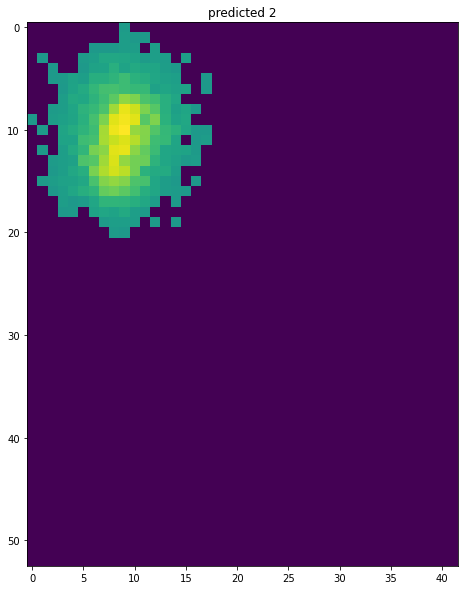

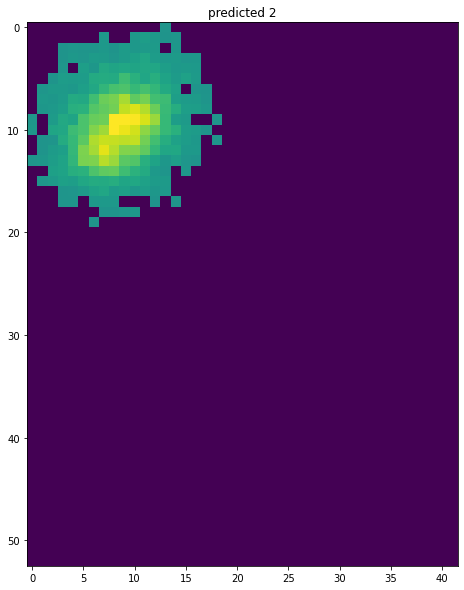

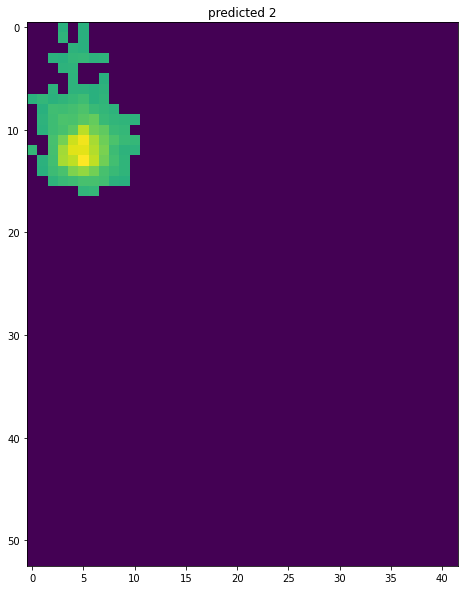

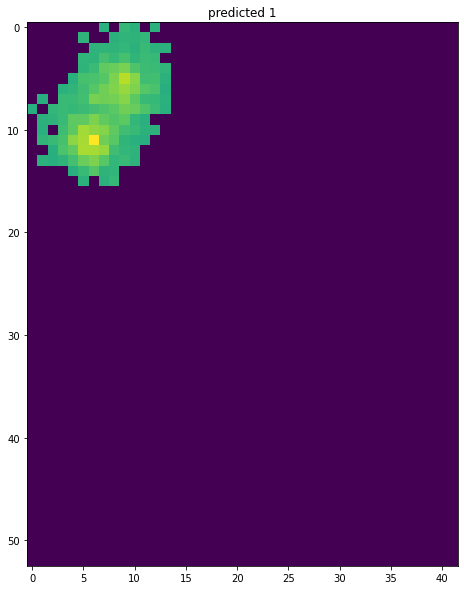

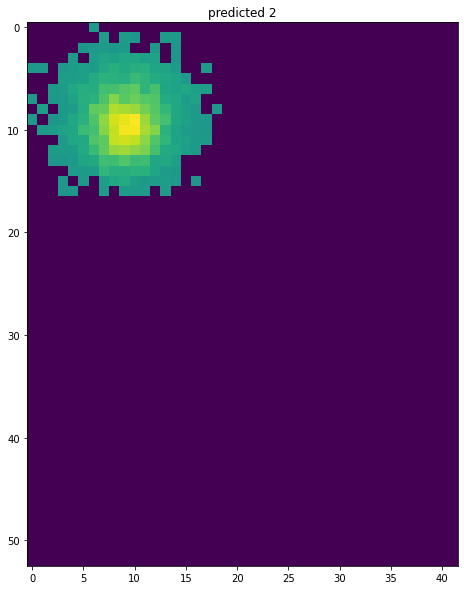

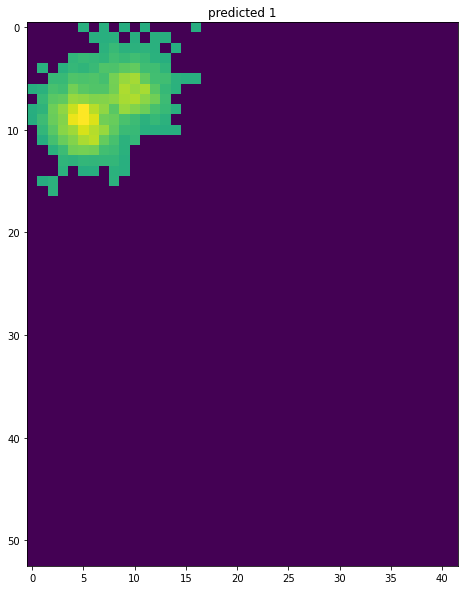

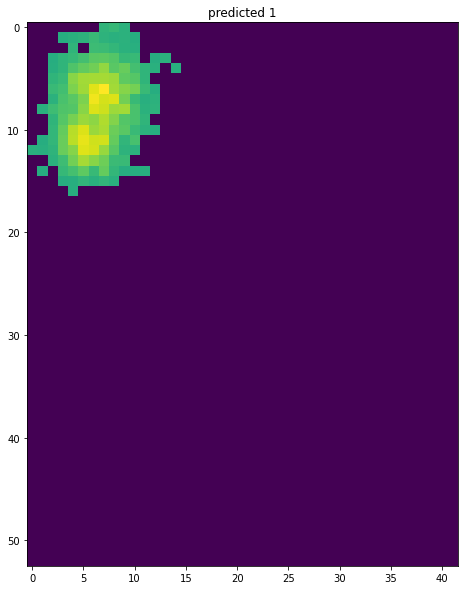

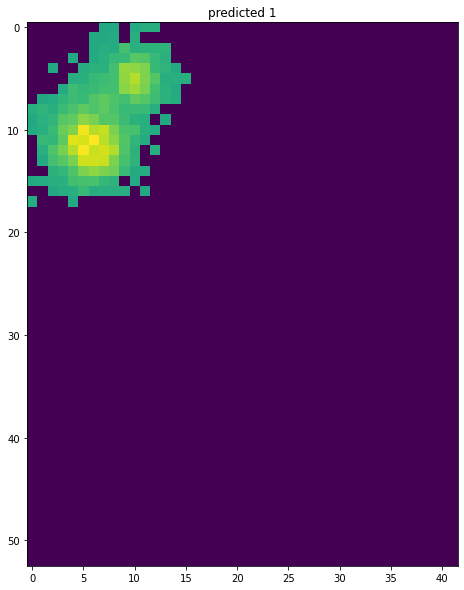

In [22]:
ind = [val[0] for val in list(enumerate(predicted == target)) if val[1] == False]
for i in ind:
    plt.figure(figsize = (10,10))
    plt.imshow(cl[i])
    plt.title('predicted %i' % predicted[i])

In [10]:
ind[2], ind[-1]

(80, 243)